<a href="https://colab.research.google.com/github/AnandKhandekar/Sampling-froma-NORMAL-using-Box-Muller/blob/master/Sampling_from_a_NORAML_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drawing Normally-distributed samples with the Box-Muller transform

Let us generate Random numbes using the basic 2D Polar to Cartesian Co-ordinates.Box-Muller sampling is based on representing the joint distribution of two independent standard Normal random Cartesian variables X and Y, 
$X\sim(0,1)$ and 
$Y\sim(0,1)$

In  Polar co ordinates, the joint distribution
*  $p(x,y)=p(x) p(y)=\frac{1}{\sqrt{2\pi}}e^{-(\frac{x^2}{2})}\frac{1}{2\pi}e^{-(\frac{y^2}{2})}=\frac{1}{2\pi}e^{-\frac {(x^2+y^2)}{2}}$

If we notice that the $x^2 + y^2$ term in the numerator of the exponent is equal to $r^2$ we can make the connection between the the Cartesian representation of the joint Normal distribution and its polar representation:
* $p(x,y)=\frac{1}{2\pi}e^{-(\frac{r^2}{2})}$ which is the product of two density functions, an [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) over squared radii:

$r^2\sim Exp(\frac{1}{2})$ and a uniform distribution over angles $\theta \sim Unif(0,2\pi)$

Also note that : $Exp(\lambda)=\frac{-\log(Unif(0,1))}{\lambda}$ then $r\sim\sqrt{-2log(Unif(0,1))}$

This gives us  a way to generate points form a joint Gaussian distribtion by samling points from two independent uniform distributions, one for $r$
and another for $\theta$. We finally transform them back into Cartesian form Polar cordinates.





***
#Steps in the Algortihm

* Draw, $u_1,u_2 \sim Unif(0,1)$
* Transform both f them into radius $r$ and angle $\theta$ where $r=\sqrt{-2log(u_1)}$ and $\theta = 2\pi \;u_2$ 
* Tranform the radius and tthe anngle to Cartesian using $x=r\; cos(\theta)$ and $y=r\sin(\theta)$

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
# the Box-Muller Algorithm 
# Draw samples from the proposal distributions

u=np.random.rand(2,100000)

r = np.sqrt(-2*np.log(u[0,:]))
theta = 2*np.pi*u[1,:]

x= r*np.cos(theta)
y=r*np.sin(theta)


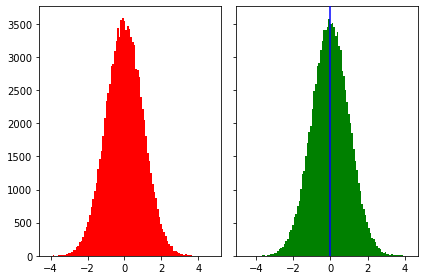

In [23]:
# Display the Box-Muller Samples
# Display "X" 
np.random.seed(42)
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(x, bins=100,color='red')
plt.axvline(0, color="blue", zorder=10)
axs[1].hist(y, bins=100,color='green')

plt.show()



# The Box-Muller transform is another example of of how uniform variables on the interval (0,1) and can be  transformed in order to sample from a more complicated distribution.